In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
train_data = pd.read_excel('/content/drive/MyDrive/dsw challenge datasets/train_data.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/dsw challenge datasets/test_data.xlsx')

In [20]:
print("\nDataset Snapshot:")
print(train_data.head())


Dataset Snapshot:
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0     

In [22]:
print("\nData Information:")
print(train_data.info())



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       


In [23]:
print("\nSummary Statistics:")
print(train_data.describe())


Summary Statistics:
        customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%    

In [24]:
missing_data = train_data.isnull().sum()
print("\nMissing Data Count:")
print(missing_data)



Missing Data Count:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [25]:
# Basic statistics for numerical columns
print("\nStatistics for Numerical Columns:")
display(train_data.describe())


Statistics for Numerical Columns:


customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%           0.000000  6.000000e+04      14.990000   13300.000000   
75%           0.000000  8.500000e+04      17.860000   20225.000000   
max          10.000000  8.900060e+06      28.990000   40000.000000   
std           0.647328  6.050616e+04       3.234215    9091.279851   

         installment    account_bal     emp_length    loan_status  
count  113705.000000  113705.000000  113705.000000  113705.000000  
mean      454.241150   15820.487094       5.959782       0.738895  
min        33.240000       0.000000       0.000000       0.000000  
25%       265.740000    5656.000000       2.000000       0.000000  
50%       388.290000   10841.000000       6.000000       1.000000  
75%       599.530000   19682.000000      11.000000       1.000000  
max      1460.430000  875598.000000      11.000000       1.000000  
std       268.251678   20447.614824       4.229570       0.439239

In [26]:
# Drop rows with missing target values if necessary
train_data.dropna(subset=['loan_status'], inplace=True)

In [28]:
# Fill missing values in numerical columns with median
numerical_columns = ['annual_inc', 'int_rate', 'cibil_score', 'account_bal']
for col in numerical_columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)

<ipython-input-28-e8398238ef7a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)


In [29]:
# Fill missing values in categorical columns with mode
categorical_columns = ['home_ownership', 'sub_grade', 'purpose']
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

<ipython-input-29-213e7b43f4fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)


In [30]:
# Verify if there are any missing values left
print("\nMissing Values After Cleaning:")
print(train_data.isnull().sum())


Missing Values After Cleaning:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


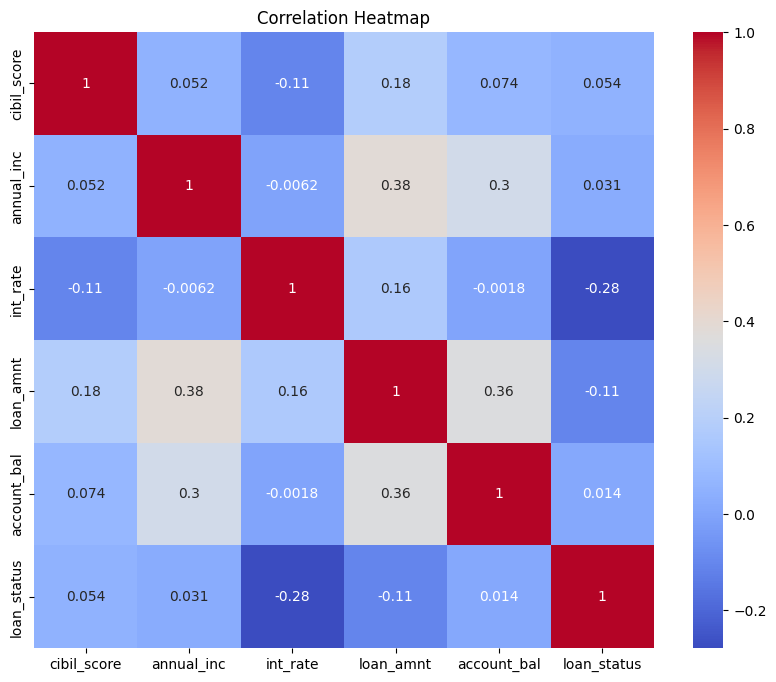

In [31]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[['cibil_score', 'annual_inc', 'int_rate', 'loan_amnt', 'account_bal', 'loan_status']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

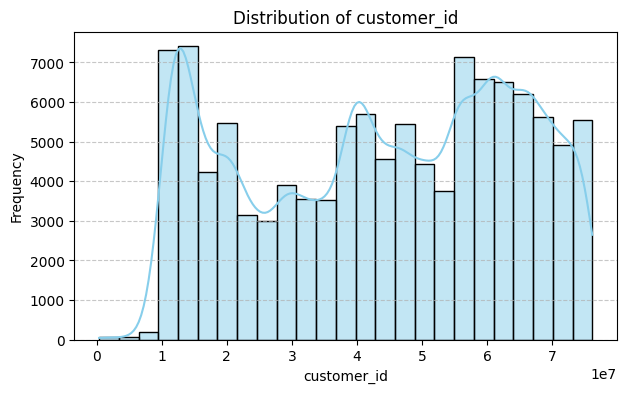

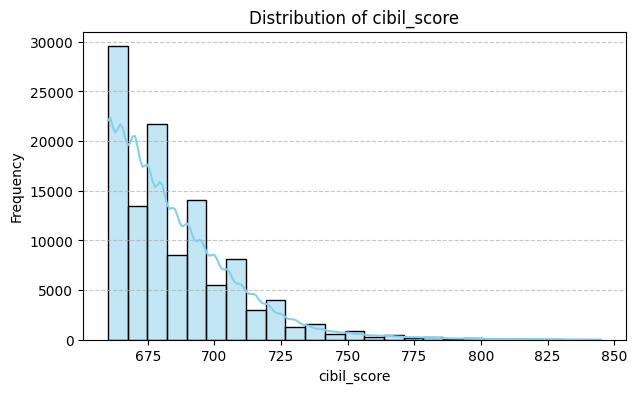

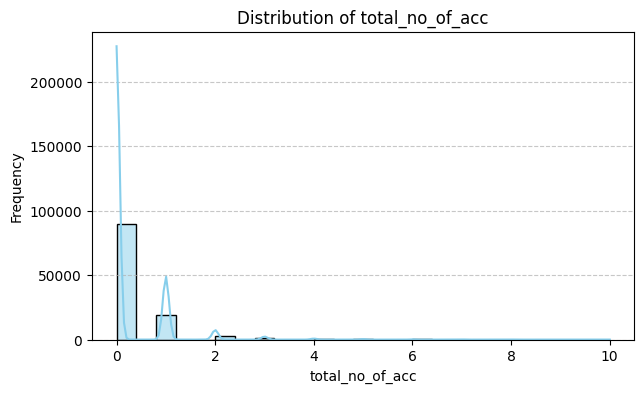

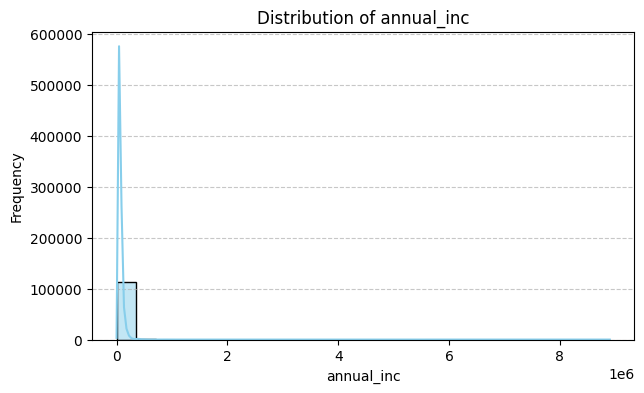

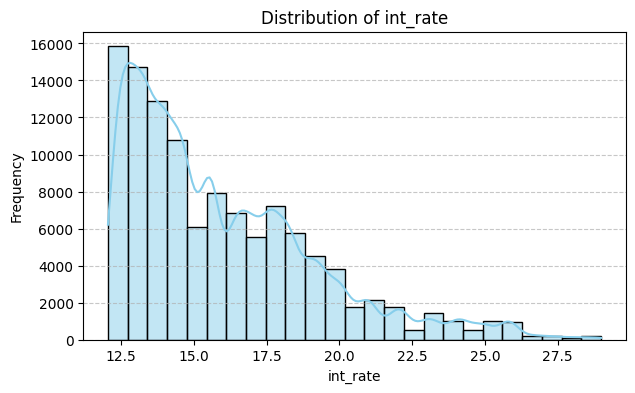

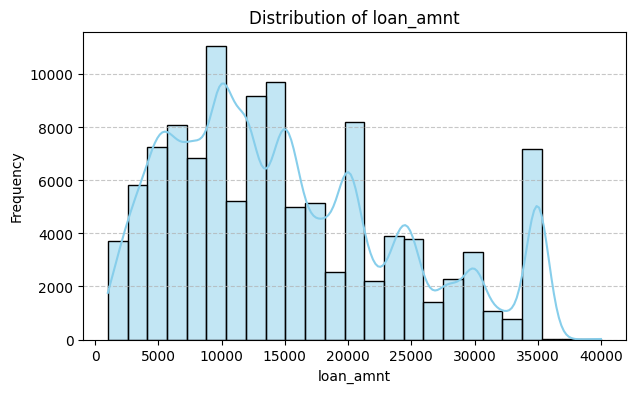

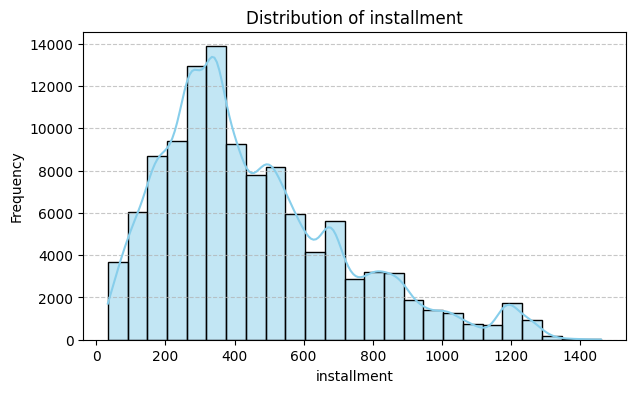

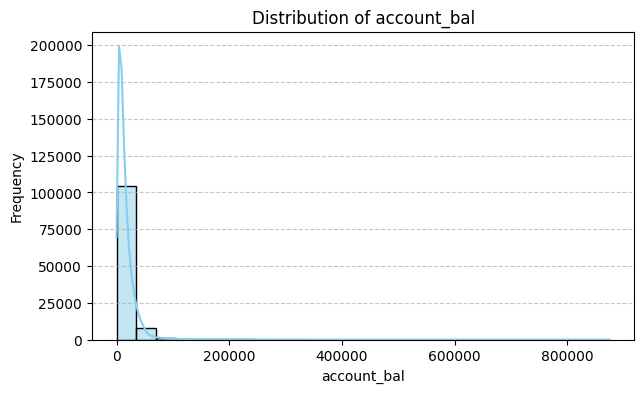

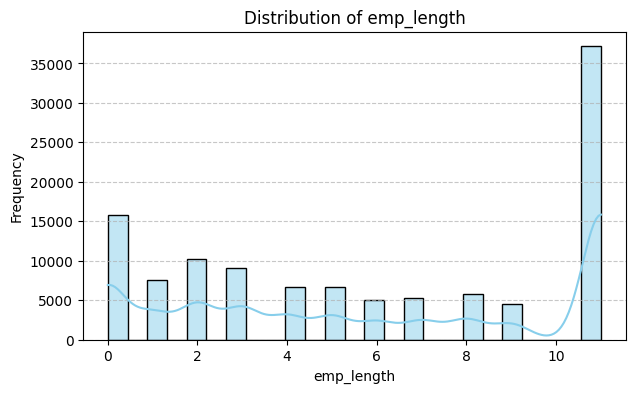

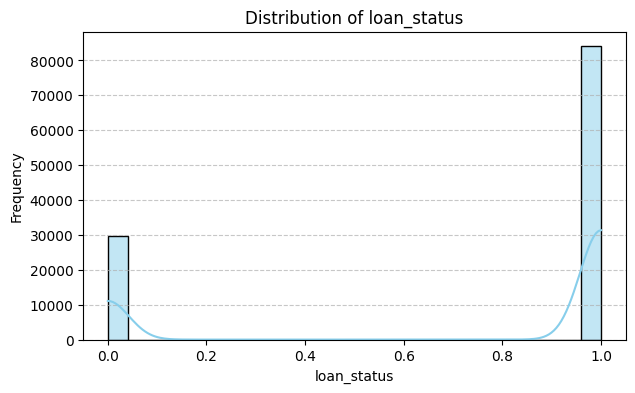

In [34]:
num_features = [col for col in train_data.columns if train_data[col].dtype in [np.float64, np.int64]]
for feature in num_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[feature].dropna(), kde=True, color='skyblue', bins=25)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

<ipython-input-37-464d04212a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette="Set2")


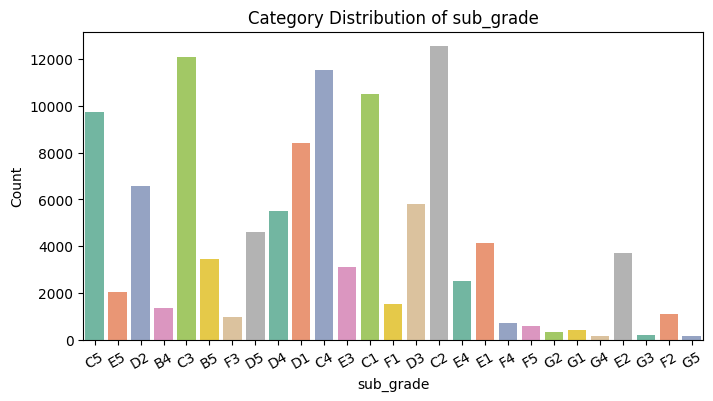

<ipython-input-37-464d04212a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette="Set2")


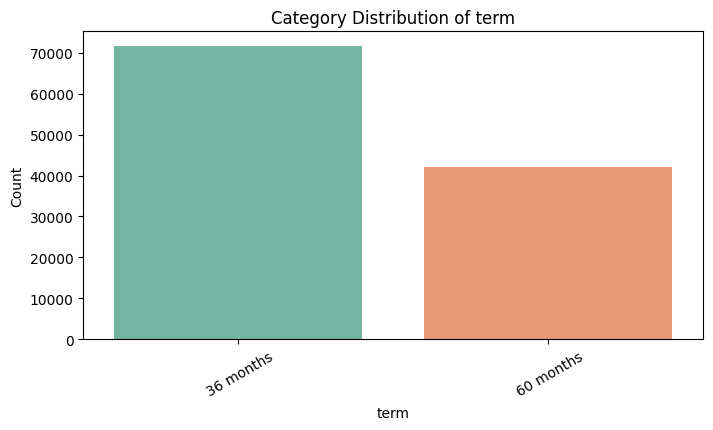

<ipython-input-37-464d04212a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette="Set2")


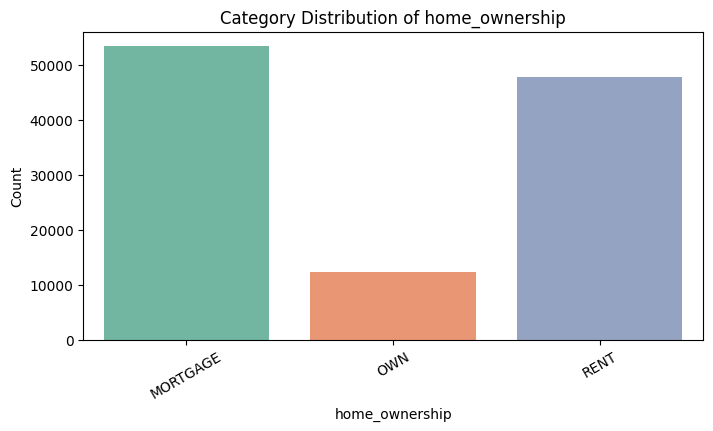

<ipython-input-37-464d04212a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette="Set2")


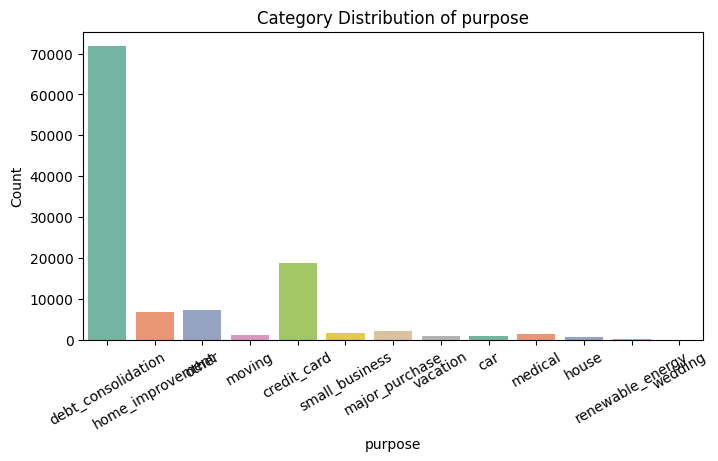

<ipython-input-37-464d04212a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette="Set2")


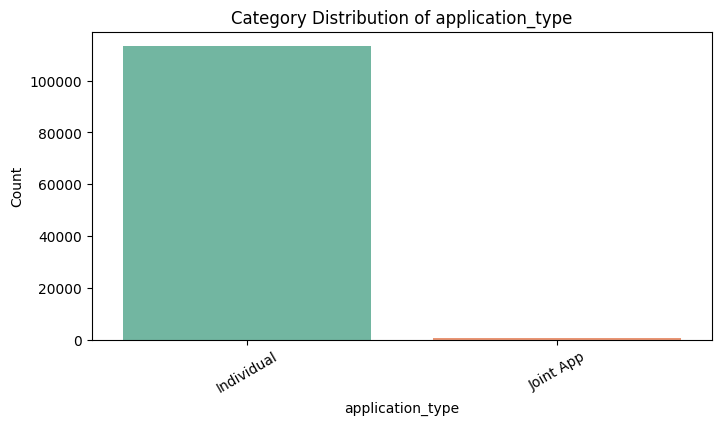

<ipython-input-37-464d04212a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=feature, palette="Set2")


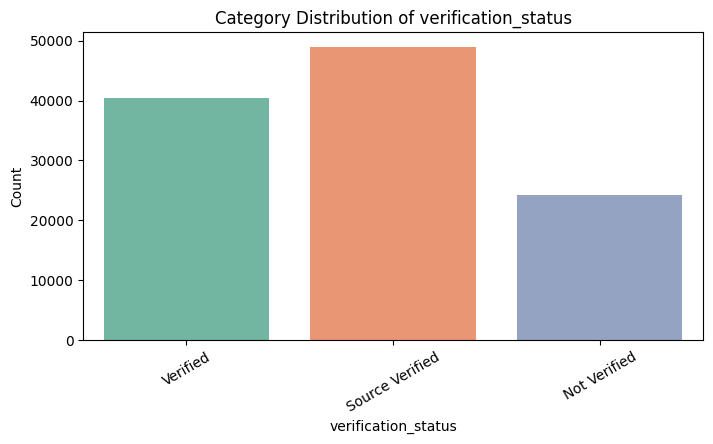

In [37]:
cat_features = [col for col in train_data.columns if train_data[col].dtype == 'object']
for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_data, x=feature, palette="Set2")
    plt.title(f"Category Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.show()

In [39]:
for col in train_data.columns:
    if train_data[col].dtype in [np.float64, np.int64]:
       train_data[col].fillna(train_data[col].mean(), inplace=True)
    elif train_data[col].dtype == 'object':
        train_data[col].fillna("Unknown", inplace=True)

print("\nMissing Data After Imputation:")
print(train_data.isnull().sum())



Missing Data After Imputation:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


<ipython-input-39-8c32e102f82c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mean(), inplace=True)
<ipython-input-39-8c32e102f82c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True